**Manipulating Images**

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

**Copying Images**

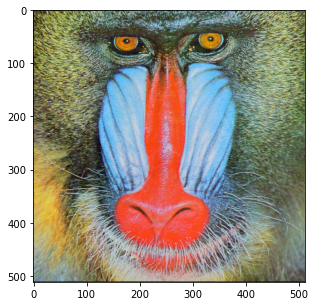

In [2]:
baboon = np.array(Image.open('baboon.png'))
plt.figure(figsize=(5,5))
plt.imshow(baboon)
plt.show()

In [3]:
A = baboon

In [4]:
id(A) == id(baboon)

True

In [5]:
B = baboon.copy()
id(B) == id(baboon)

False

In [6]:
baboon[:,:,] = 0

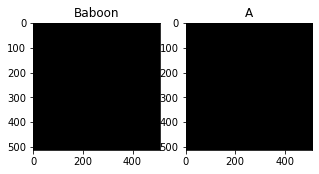

In [7]:
plt.figure(figsize=(5,5))
plt.subplot(121)
plt.imshow(baboon)
plt.title('Baboon')
plt.subplot(122)
plt.imshow(A)
plt.title('A')
plt.show() # We see they are the same. This behaviour is called aliasing. Aliasing happens whenever one variable's value is assigned to another variable.#
#Variables are references to values on the memory.

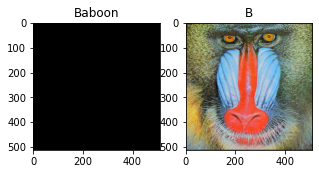

In [8]:
plt.figure(figsize=(5,5))
plt.subplot(121)
plt.imshow(baboon)
plt.title("Baboon")
plt.subplot(122)
plt.imshow(B)
plt.title("B")
plt.show()

In [9]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\tripa\\OpenCV\\assets'

In [10]:
image_path = os.path.join(cwd, 'cat.png')
image_path

'C:\\Users\\tripa\\OpenCV\\assets\\cat.png'

**Flipping Image**

Flipping images involoves involves reordering the indices of the pixels such that it changes the orientation of the image. 


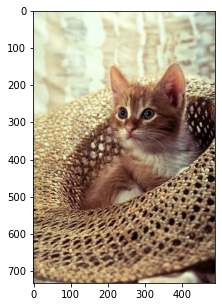

In [11]:
cat = Image.open("cat.png")
plt.figure(figsize=(5,5))
plt.imshow(cat)
plt.show()

We can cast it to an array and find its shape:

In [12]:
array = np.array(cat)
width, height, c = array.shape
print('Width, Height, C', width, height, c)

Width, Height, C 733 490 3


In [13]:
array_flip = np.zeros((width, height, c), dtype = np.uint8)

In [14]:
for i, row in enumerate(array):
    array_flip[width -1-i, :, :] = row

In [15]:
from PIL import ImageOps

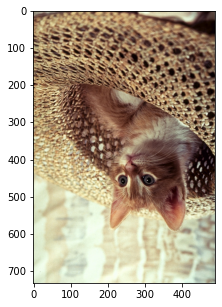

In [16]:
im_flip = ImageOps.flip(cat)
plt.figure(figsize=(5,5))
plt.imshow(im_flip)
plt.show()

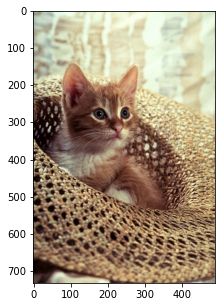

In [17]:
im_mirror = ImageOps.mirror(cat)
plt.figure(figsize=(5,5))
plt.imshow(im_mirror)
plt.show()

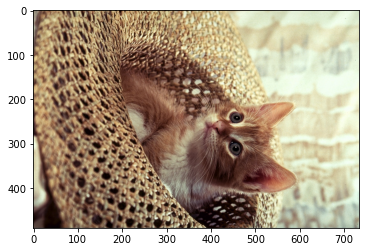

In [18]:
im_flip = cat.transpose(4)
plt.imshow(im_flip)
plt.show()

The Image module has built-in attributes that describe the type of flip. The values are just integers. Several are shown in the following dict:

In [19]:
flip = {"FLIP_LEFT_RIGHT": Image.FLIP_LEFT_RIGHT,
        "FLIP_TOP_BOTTOM": Image.FLIP_TOP_BOTTOM,
        "ROTATE_90": Image.ROTATE_90,
        "ROTATE_180": Image.ROTATE_180,
        "ROTATE_270": Image.ROTATE_270,
        "TRANSPOSE": Image.TRANSPOSE, 
        "TRANSVERSE": Image.TRANSVERSE}

In [20]:
flip["FLIP_LEFT_RIGHT"]

0

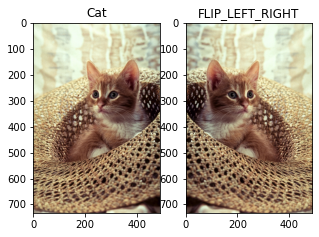

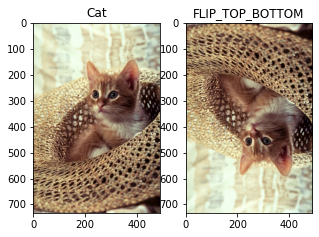

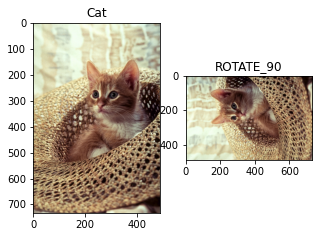

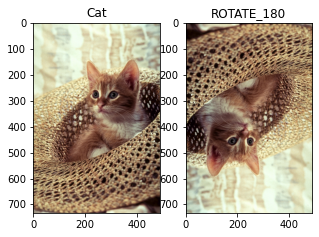

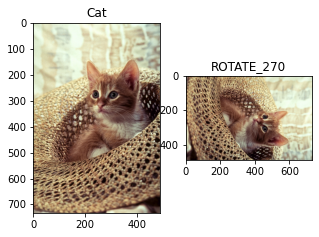

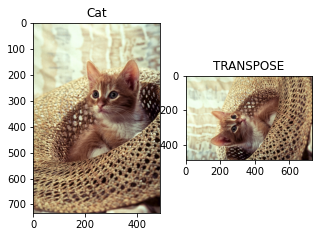

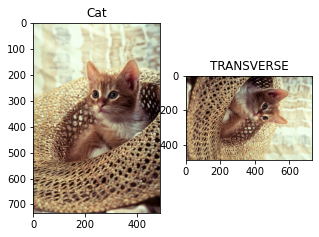

In [21]:
for key, values in flip.items():
    plt.figure(figsize=(5,5))
    plt.subplot(121)
    plt.title("Cat")
    plt.imshow(cat)
    plt.subplot(122)
    plt.imshow(cat.transpose(values))
    plt.title(key)
    plt.show()
    

**Cropping an Image**

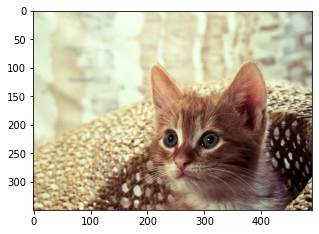

In [22]:
upper = 50
lower = 400
crop_top = array[upper:lower,:,:]
plt.figure(figsize=(5,5))
plt.imshow(crop_top)
plt.show()

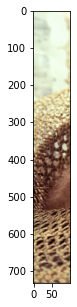

In [23]:
right = 100
left = 200
crop_horizontal = array[:,right:left,:]
plt.figure(figsize=(5,5))
plt.imshow(crop_horizontal)
plt.show()

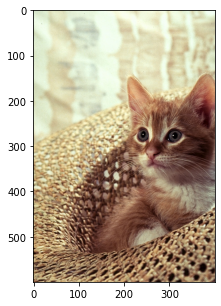

In [24]:
left = 0
upper = 0
right = 400
lower = 600
cat = Image.open("cat.png")
crop_cat = cat.crop((left,upper,right,lower))
plt.figure(figsize=(5,5))
plt.imshow(crop_cat)
plt.show()

In [25]:
crop_cat = crop_cat.transpose(Image.FLIP_LEFT_RIGHT)

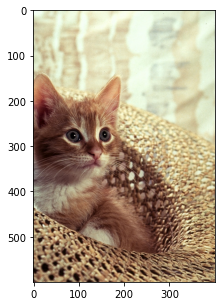

In [26]:
plt.figure(figsize=(5,5))
plt.imshow(crop_cat)
plt.show()

**Changing Specific Image Pixles**

We can change specific image pixles using array indexing; e.g. we can set all the green and blue channels in the original image we cropped to zero:

In [27]:
array_square = np.copy(array)
array_square[upper:lower,left:right,0:1] = 0

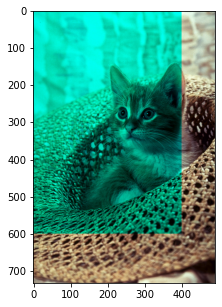

In [28]:
plt.figure(figsize=(5,5))
plt.imshow(array_square)
plt.show()

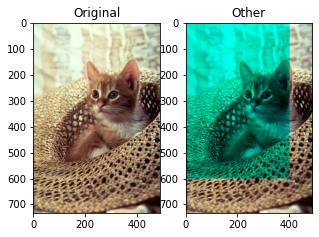

In [29]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(array)
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(array_square)
plt.title("Other")
plt.show()

In [30]:
from PIL import ImageDraw, ImageFont, ImageDraw

In [31]:
image_draw = cat.copy()

The draw constrocter creatres an object that can be used to draw in the given image. The input 'im' is the image we would like to draw in.

In [32]:
image_fn = ImageDraw.Draw(im = image_draw)

Whatever method we apply to the object image_fn, will change the image object image_draw.

We can draw a rectangle using the rectangle function, two important parameters include: xy – the coordinates bounding box and fill – Color of the rectangle.

In [33]:
left, upper, right, lower = 50, 50, 150, 150
shape = [left, upper, right, lower]
image_fn.rectangle(xy=shape, fill='red')

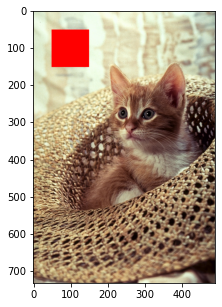

In [34]:
plt.figure(figsize=(5,5))
plt.imshow(image_draw)
plt.show()

There are other shapes we can use. e.g. we can also overlay text on an image: we use the ImageFont module to obtain bitmap fonts.

We use the text method to place the text on the image. The parameters include xy (the top-left anchor coordinates of the text), the parameter text (the text to be drawn), and fill (the color to use for the text).

In [39]:
image_fn.text(xy=(10,10), text="Yo", fill=(0,0,0))

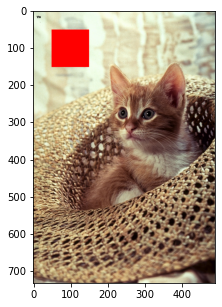

In [41]:
plt.figure(figsize=(5,5))
plt.imshow(image_draw)
plt.show()

We can overlay or paste one image over another by reassigning the pixel for one array to the next. Consider the following image array:

In [42]:
image_lenna = Image.open("lenna.png")
array_lenna = np.array(image_lenna)

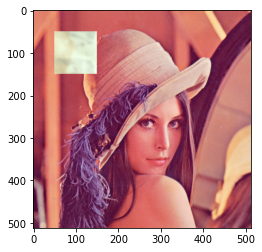

In [45]:
array_lenna[upper:lower, left:right,:] = array[upper:lower, left:right,:] #Both should be represented as an array, not as an image.
plt.imshow(array_lenna)
plt.show()

In the same manner, the 'paste()' method allows you to overlay one image over another, with the input being the image you would like to overlay. The parameter box is the left and upper coordinate of the image:

In [46]:
image_lenna.paste(crop_cat, box=(left, upper))

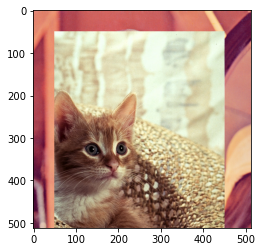

In [47]:
plt.imshow(image_lenna)
plt.show()

We can see the method 'copy()' applies to some PIL objects. We create two image objects, we set 'new_image' to the 'image', and we use the method 'copy()' for the 'copy_image' object. 

In [49]:
image = Image.open("cat.png")
new_image = image
copy_image = image.copy()

In [50]:
image_fn = ImageDraw.Draw(im = image)
image_fn.text(xy=(0,0), text="box", fill=(0,0,0))
image_fn.rectangle(xy=shape, fill="red")

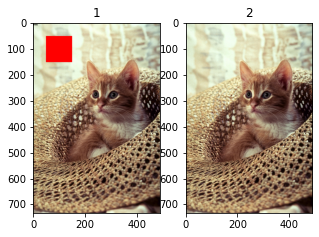

In [51]:
plt.figure(figsize=(5,5))
plt.subplot(121)
plt.imshow(new_image)
plt.title('1')
plt.subplot(122)
plt.imshow(copy_image)
plt.title('2')
plt.show()

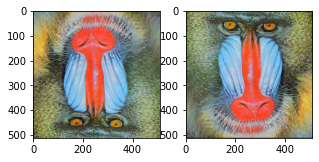

In [52]:
im = Image.open("baboon.png")
im_flip = ImageOps.flip(im)
im_mirror = ImageOps.mirror(im)
plt.figure(figsize=(5,5))
plt.subplot(121)
plt.imshow(im_flip)
plt.subplot(122)
plt.imshow(im_mirror)
plt.show()